In [4]:
!pip install factor_analyzer
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import matplotlib.pyplot as plt
sample_data = {
    'v1': [2.5, 3.0, 2.8, 3.2, 3.1, 2.9, 3.5, 3.3, 2.7, 3.4],
    'v2': [1.9, 2.2, 2.1, 2.5, 2.3, 2.0, 2.6, 2.4, 1.8, 2.7],
    'v3': [4.1, 4.5, 4.3, 4.8, 4.6, 4.0, 4.9, 4.7, 4.2, 4.4],
    'v4': [3.8, 4.0, 3.9, 4.2, 4.1, 3.7, 4.3, 4.4, 3.6, 4.5],
    'v5': [2.2, 2.6, 2.4, 2.7, 2.5, 2.1, 2.8, 2.6, 2.3, 2.9],
    'v6': [5.0, 5.2, 5.1, 5.5, 5.3, 4.9, 5.6, 5.4, 4.8, 5.7]
}
data = pd.DataFrame(sample_data)
data

,v1,v2,v3,v4,v5,v6
0,2.5,1.9,4.1,3.8,2.2,5.0
1,3.0,2.2,4.5,4.0,2.6,5.2
2,2.8,2.1,4.3,3.9,2.4,5.1
3,3.2,2.5,4.8,4.2,2.7,5.5
4,3.1,2.3,4.6,4.1,2.5,5.3
5,2.9,2.0,4.0,3.7,2.1,4.9
6,3.5,2.6,4.9,4.3,2.8,5.6
7,3.3,2.4,4.7,4.4,2.6,5.4
8,2.7,1.8,4.2,3.6,2.3,4.8
9,3.4,2.7,4.4,4.5,2.9,5.7


In [5]:
chi_square_value, p_value = calculate_bartlett_sphericity(data)
print(f"Bartlett's test: Chi-square value: {chi_square_value:.2f}, p-value: {p_value:.3f}")
kmo_all, kmo_model = calculate_kmo(data)
print(f"KMO Test: {kmo_model:.2f}")
print("-" * 50)


Bartlett's test: Chi-square value: 79.73, p-value: 0.000
KMO Test: 0.72
--------------------------------------------------


C:\Users\User\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Eigenvalues:
[5.38429861e+00 3.27323049e-01 1.49129910e-01 9.45247065e-02
 4.24215476e-02 2.30218072e-03]


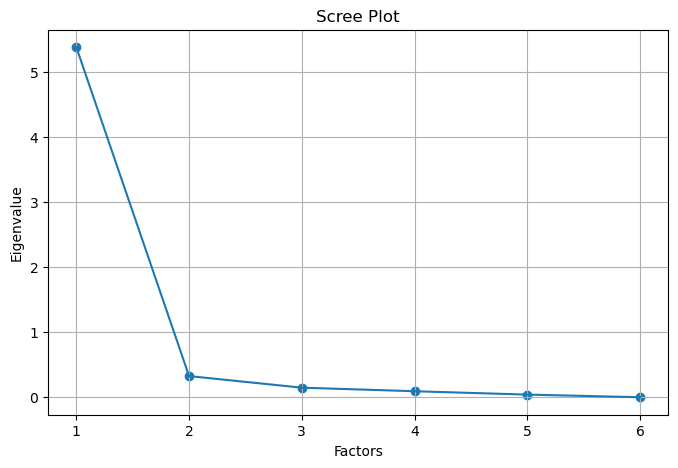

In [6]:

fa_initial = FactorAnalyzer()
fa_initial.fit(data)

eigen_values, _ = fa_initial.get_eigenvalues()
print("Eigenvalues:")
print(eigen_values)
plt.figure(figsize=(8, 5))
plt.scatter(range(1, data.shape[1] + 1), eigen_values)
plt.plot(range(1, data.shape[1] + 1), eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


In [7]:

fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(data)
loadings = pd.DataFrame(fa.loadings_, index=data.columns, columns=['Factor 1', 'Factor 2'])
print("\nFactor Loadings:")
print(loadings)

variance = pd.DataFrame(fa.get_factor_variance(), index=['SS Loadings', 'Proportion Var', 'Cumulative Var'], columns=['Factor 1', 'Factor 2'])
print("\nFactor Variance:")
print(variance)


Factor Loadings:
    Factor 1  Factor 2
v1  0.783025  0.492631
v2  0.909177  0.412844
v3  0.444907  0.893137
v4  0.875044  0.399089
v5  0.798695  0.493376
v6  0.896193  0.427232

Factor Variance:
                Factor 1  Factor 2
SS Loadings     3.844453  1.796037
Proportion Var  0.640742  0.299340
Cumulative Var  0.640742  0.940082


C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
